**Support Vector Machine (SVM)** 

선형/비선형 분류, 회귀, 이상치 탐색 등 다목적 사용이 가능한 머신러닝 모델
퍼셉트론 기반의 모형에 가장 안정적인 경계선을 찾기 위한 제한조건을 추가한 모델


마진오류 (하이퍼파라미터 C로 조절)
 하드 마진 분류 vs 소프트 마진 분류

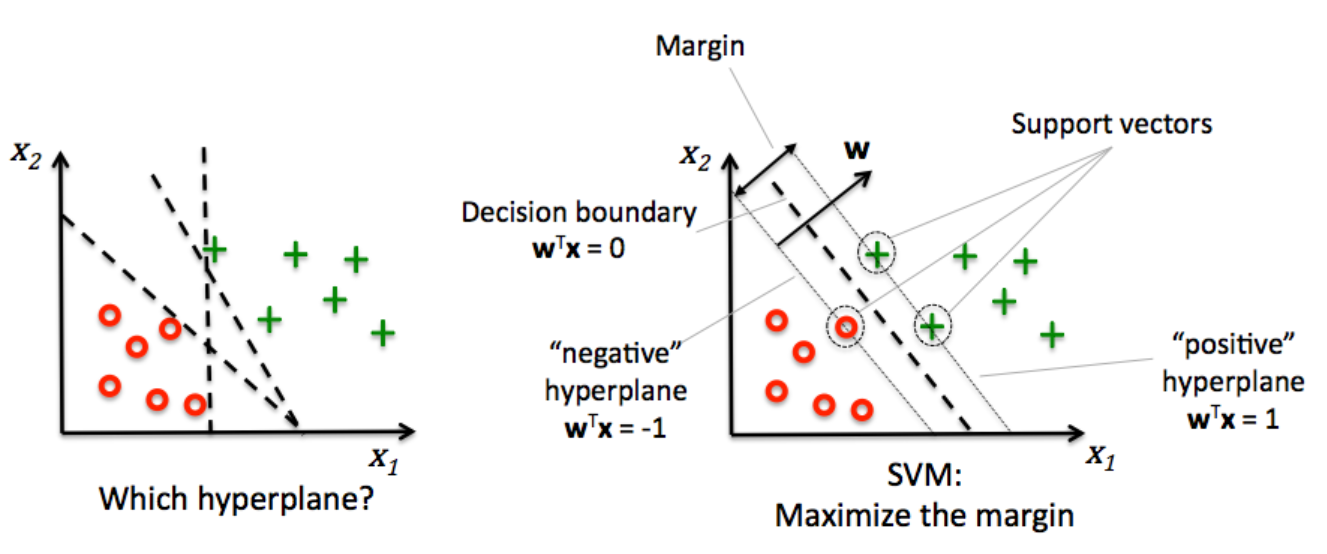

In [2]:
from PIL import Image
Image.open("/Users/chooki/Downloads/SVM.png")

**이진분류문제(Binary Classification), 선형SVM 라고 가정**

* 결정/판별 함수(Decision Function)    
   : 선형 SVM 분류기는 결정함수를 계산해서 새로운 샘플 x의 클래스를 예측  
   
   $$f(x) = w^Tx-b$$  
   
   $$\hat{y}=\begin{cases} +1, & \mbox{if }w^Tx-b>0 \\
                           -1, & \mbox{if }w^Tx+b<0 \end{cases}$$


* 결정/판별 경계(Decision Boundary, 오른쪽 그림에서 점선으로 표시)  
   : 결정함수의 값이 0인 점들로 이루어진 선. 두 평면(hyperplane)의 교차점으로 직선
   
   
* 초평면(Hyperplaine)  
  : 결정함수의 값이 +1 / -1인 선   


* 서포트(Support) or 서포트벡터(Support vector)  
  : 각 클래스에 속한 데이터 중에서 가장 결정경계에 가까이 붙어있는 최전방 데이터들  
    $\;$ 결정 경계와 데이터  서포트(x+ ,  x−)  사이의 거리는 다음과 같이 주어진다. (직선과 점의 거리) 

   $$ \frac{w^T x^{+} - w_0}{\lVert w\rVert}=\frac{1}{\lVert w\rVert}$$
   
   $$ -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$
   
   이 거리의 합을 **마진(margin)**이라고 하며 마진값이 클 수록 더 경계선이 안정적  
   **마진오류(margin violation)**는 샘플이 마진 사이에 있거나 반대쪽 클래스에 있는 경우
   
   마진의 넓이와 마진오류의 허용에 따라  
   하드 마진 분류 / 소프트 마진 분류로 나눠짐
   
   
* 목적함수  
  : 마진 값 ($\frac{2}{\lVert w\rVert}$)을 크게 하기 위해 ${\lVert w\rVert}$을 최소화    
    $\;$가중치 벡터의 놈($l_2$)이 최소가 되는 경우와 같다.
    
    $$ L = \dfrac{1}{2} ||w||^2 = \dfrac{1}{2} w^T w $$
    
   $||w||$ 대신 $\dfrac{1}{2} ||w||^2$를 최소화하면  
   미분을 할 때, Norm 기호 대신 $w^T w$로 쓸 수 있어서 계산이 편해짐  
   그리고 ||w||은 w=0에서 미분 할 수 없음
 
   우리가 SVM에서 원하는 것은 목적함수를 최소화하기 이전에 분류를 제대로 하는 것이므로  
   모든 데이터 $x_i,y_i (i = 1, ..., N)$에 대해 다음 조건을 만족해야 한다.
   
   $$y_i \cdot f(x_i) = y_i \cdot( w^Tx_i - w_o) \geq 1 \;\;\; ( i = 1, \ldots, N )$$
   
   위 식은 다음과 같은 뜻이다.  
   만약에 $y_1$이 1이라면 $x_1$ 데이터를 넣으면 판별함수 $f(x_1)$이 제대로 분류를 한다면 1이라는 답을 낼 것이고, 두개의 곱은 1이상이 된다.  
   반대로 $y_2$가 -1이라면 $x_2$ 데이터를 넣으면 판별함수 $f(x_2)$은 -1이라는 답을 낼 것이고, 두 개의 곱 역시 1이상이 된다.
   
   **하드 마진 SVM의 최소화 목적함수**는 다음과 같다.
   $$L = \dfrac{1}{2} w^T w - \sum_{i=1}^N \lambda \{ y_i \cdot ( w^Tx_i - w_o) - 1 \}$$
   
   이 최적화 문제를 풀어  $w,  w_0,  \lambda$ 를 구하면 판별함수를 얻을 수 있다.
   
   KKT조건(3가지) 중 2번째 조건 '라그랑주 승수와 부등식 제한조건의 곱이 0'에 의해
   $y_i \cdot ( w^Tx_i - w_o) - 1 \neq 0$인 경우는 $\lambda = 0$이 된다.
   
   
* 슬랙변수  
  : 데이터가 직선인 판별경계선으로 나누어지지 않는 즉, 선형분리가 불가능한 경우(하드 마진 분류가 안됨)    
    $\;$슬랙변수($\zeta$, zeta)를 사용하여 개별적인 오차($i$번째 샘플이 얼마나 마진을 위반할지)를 허용  
  $\;$슬랙변수를 활용하면 판별함수에 대한 기준이 완화된다. (슬랙변수는 0보다 같거나 크다)
  
$$y_i(w^Tx_- - w_0) \geq 1-\xi_i$$  

$$\zeta_i \geq 0 \;\;\; (i=1, \ldots, N)$$

  **소프트 마진 SVM의 최소화 목적함수**  
$$L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i$$

위 식에서 $C \sum_{i=1}^N \xi_i$ 항은 슬랙변수의 합이 너무 커지지 않도록 제한하는 역할을 한다.

Parameter C가 커지면 슬랙변수의 합이 커지지 않고 결국 마진 오류를 적게 허용  
Parameter C가 작아면 슬랙변수의 합이 커지게 되고 마진 오류를 많이 허용하게 된다.

마진 오류를 최소화하기 위해 가능한 슬랙 변수의 값을 작게 만드는 것(C값이 커짐)과  
마진을 크게 하기 위해서 $\dfrac{1}{2} w^T w$를 가능한 작게 만드는 것(C값이 작아짐)

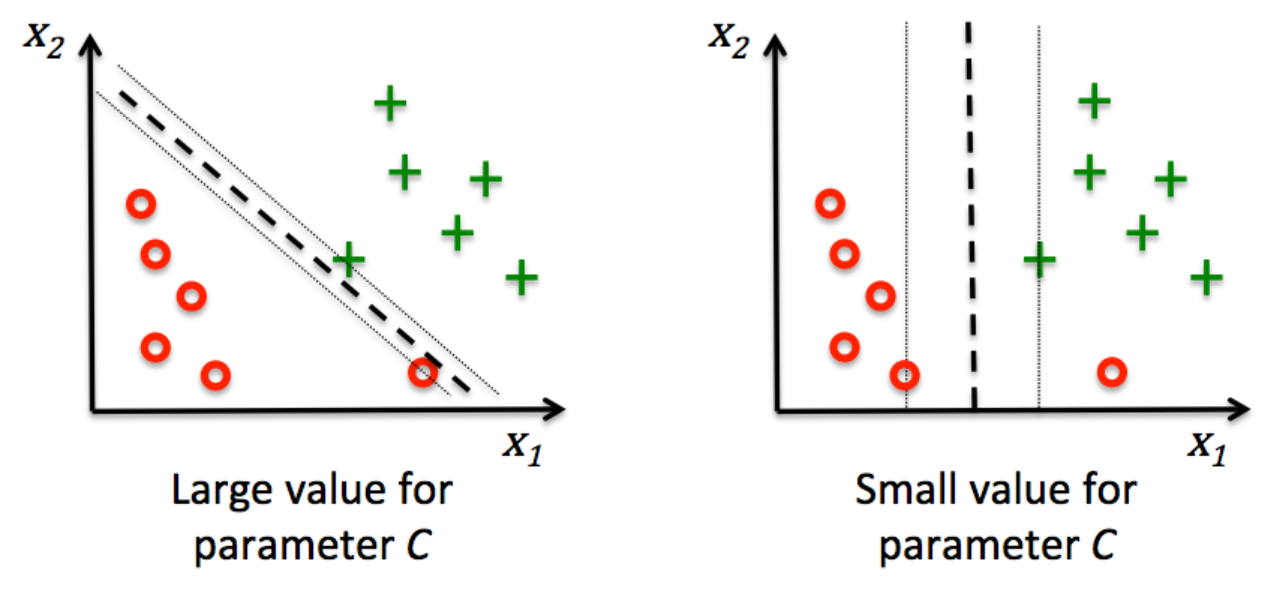

In [3]:
from PIL import Image
Image.open("/Users/chooki/Downloads/SVM parameter C.png")

**Dual Form**


**QP문제**